# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Warning message:
"package 'mclust' was built under R version 3.6.2"Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [2]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 


a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.

El método Mclust se inicia mediante agrupamiento jerarquico para modelos de mezcla gaussianos parametrizados.
Parametros de entrada: un vector de datos estructurados, G es un vector entero que especifica el numero de agrupaciones de los datos.
Parametros de salida: Puede agrupar los datos para mostrar mapa de densidad, o clasificar los datos en las categorias que tiene el dataset.


b) Interprete y comente los resultados obtenidos. 

Crea agrupamiento por los componentes de la leche y detalla las especies que aportaron con muestras para analizar la leche.
Mas especificamente, el ejercicio fuerza a que se formen 4 grupos, por lo tanto busca dentro de los modelos posibles el que tenga la menor funcion de perdida con G=4, en este caso VEV, luego como de solicitan los valores medios, despliega el valor medio de cada componente entre los integrantes de cada grupo.<br>
Después de eso, se calculó directamente el BIC, generando un sumario y una representación gráfica, permitiendo observar los modelos mas convenientes y con que G logran la mayor verosimilitud (Verosimilitud es inversa a Funcion de perdida).<br>
En cambio cuando no se le indica un número de grupos, busca el BIC con mayor verosimilitud, siendo en este caso G=9.

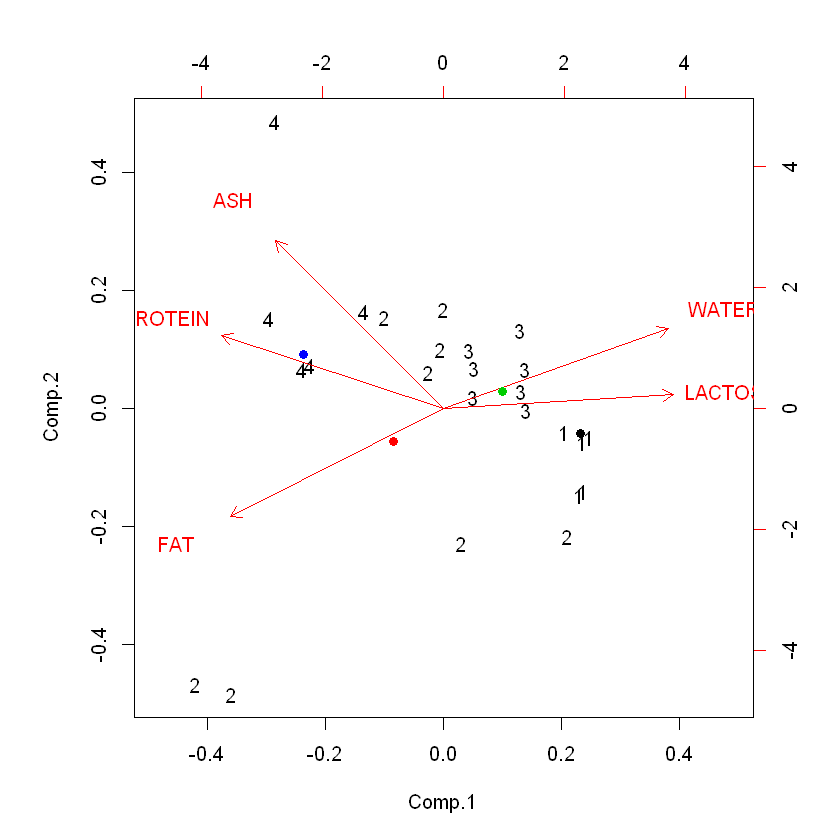

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 2 components: 

 log-likelihood  n df       BIC       ICL
      -176.5541 25 40 -481.8633 -481.8762

Clustering table:
 1  2 
18  7 

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
84.69570,5.001479,4.969356,4.821686,0.7596701
61.41853,9.328688,24.053235,2.356288,1.1297551


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          1          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2

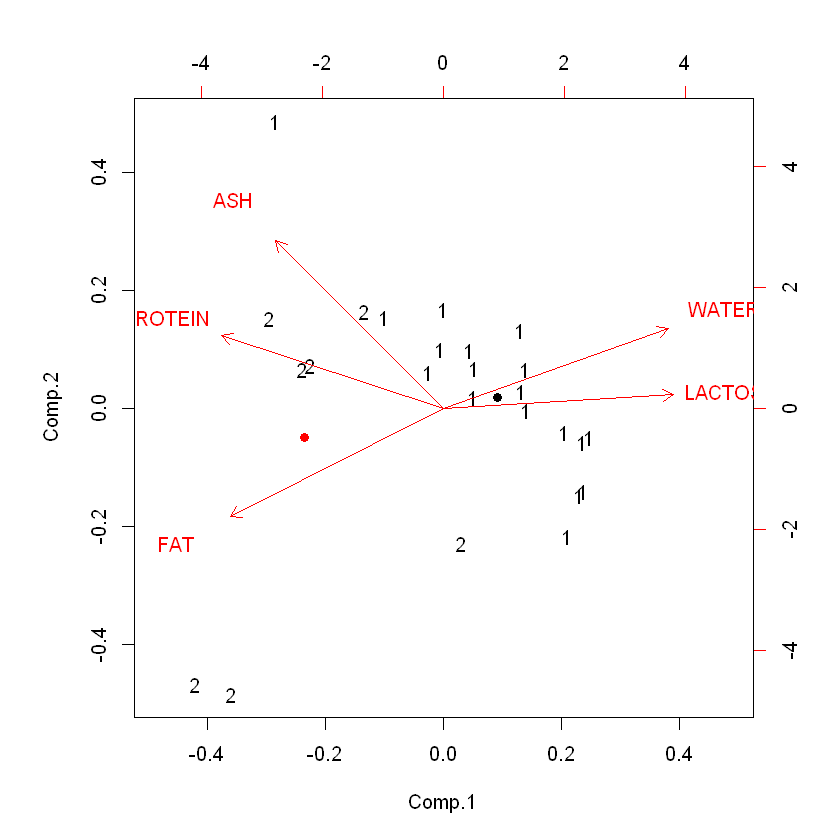

In [4]:
#Para 2 grupos
clus <-Mclust(datos, G=2)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

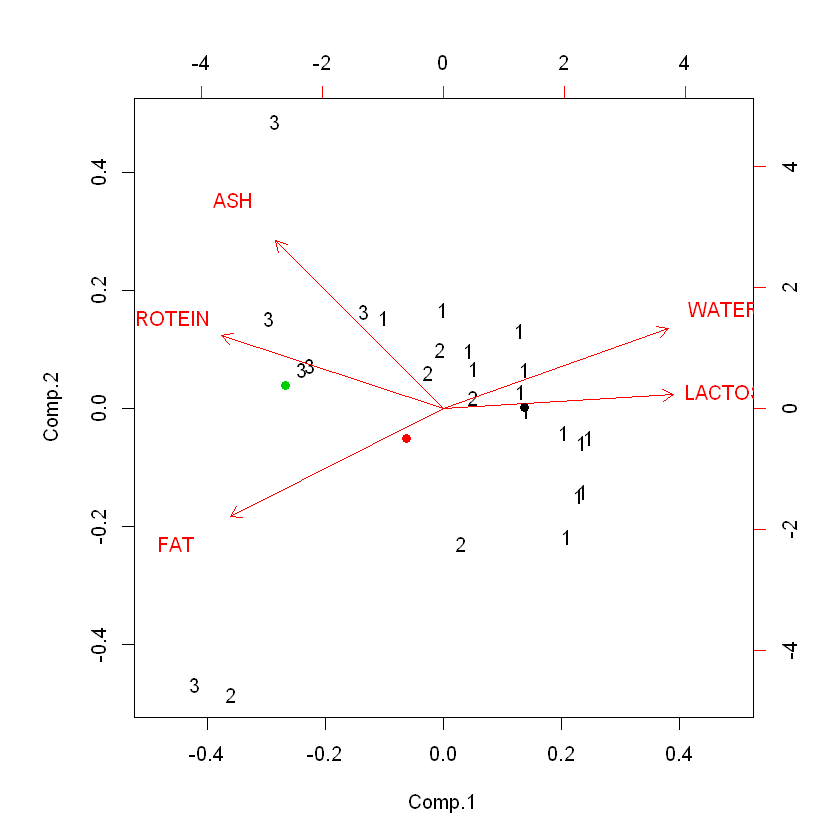

In [5]:
#Para 3 grupos 
clus <-Mclust(datos, G=3)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

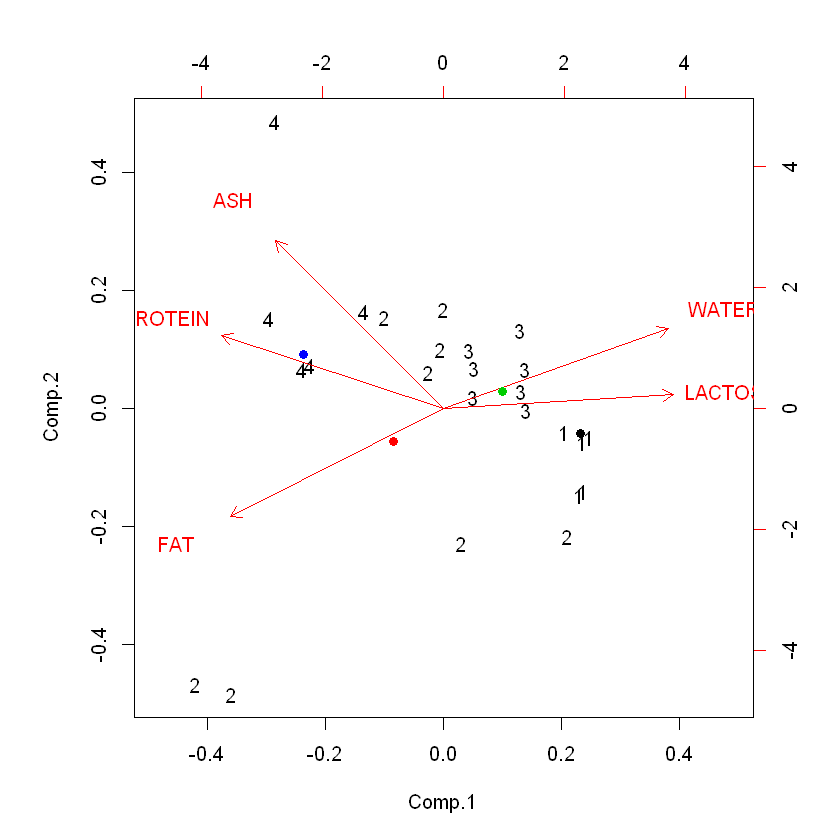

In [6]:
#Para 4 grupos 
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

Las agrupaciones que se formaron con k-means eran diferentes, por lo que los resultados tambien lo fueron, es decir las agrupaciones eran diferentes, por lo que en cada feature los valores son distintos.

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

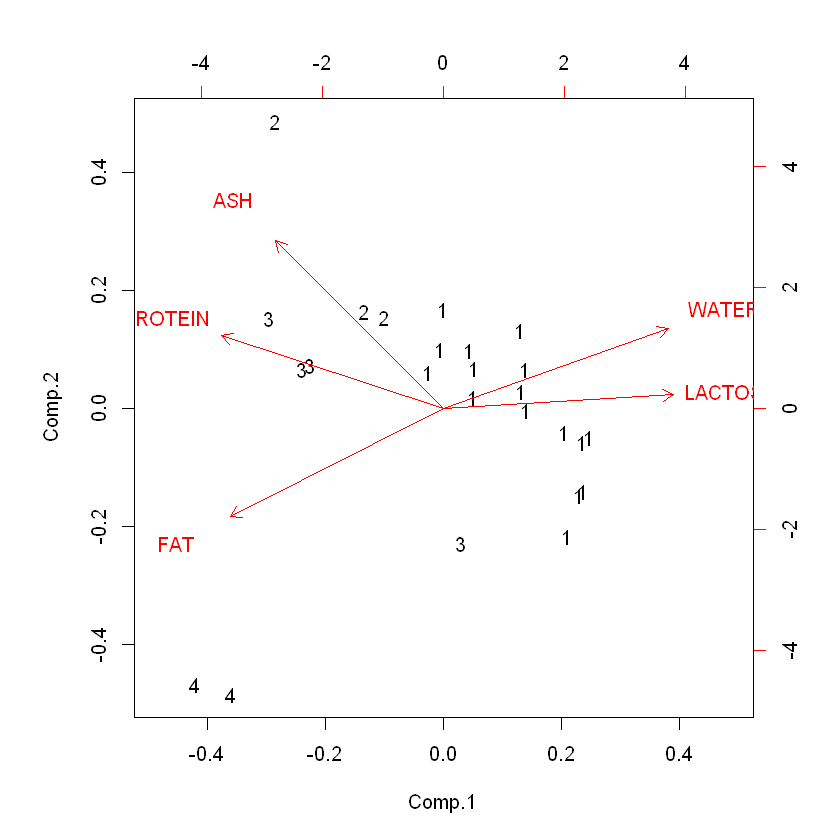

In [9]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

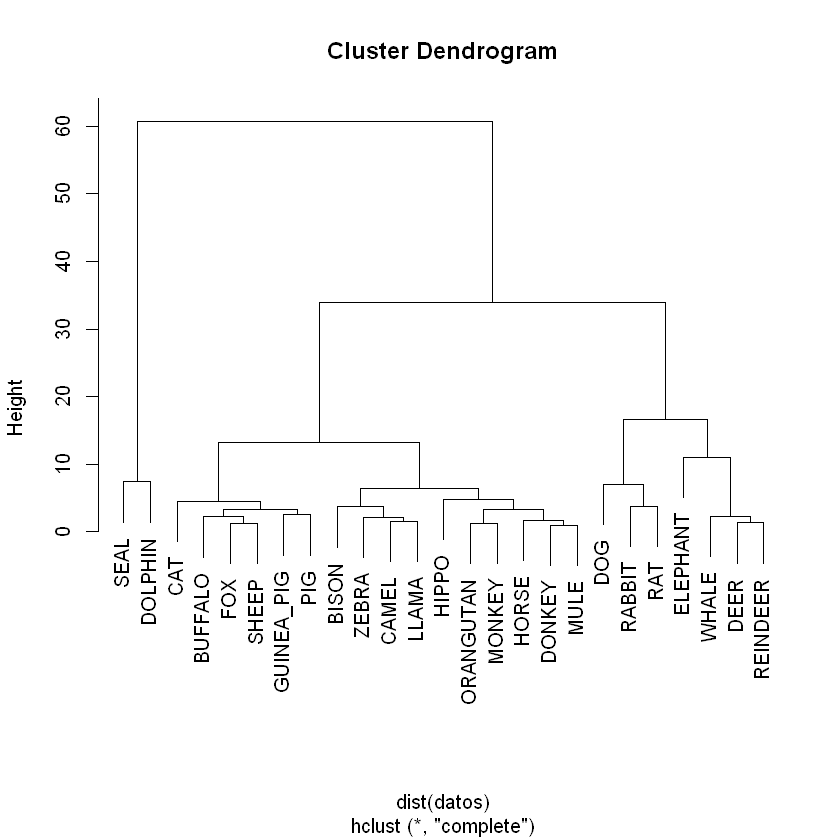

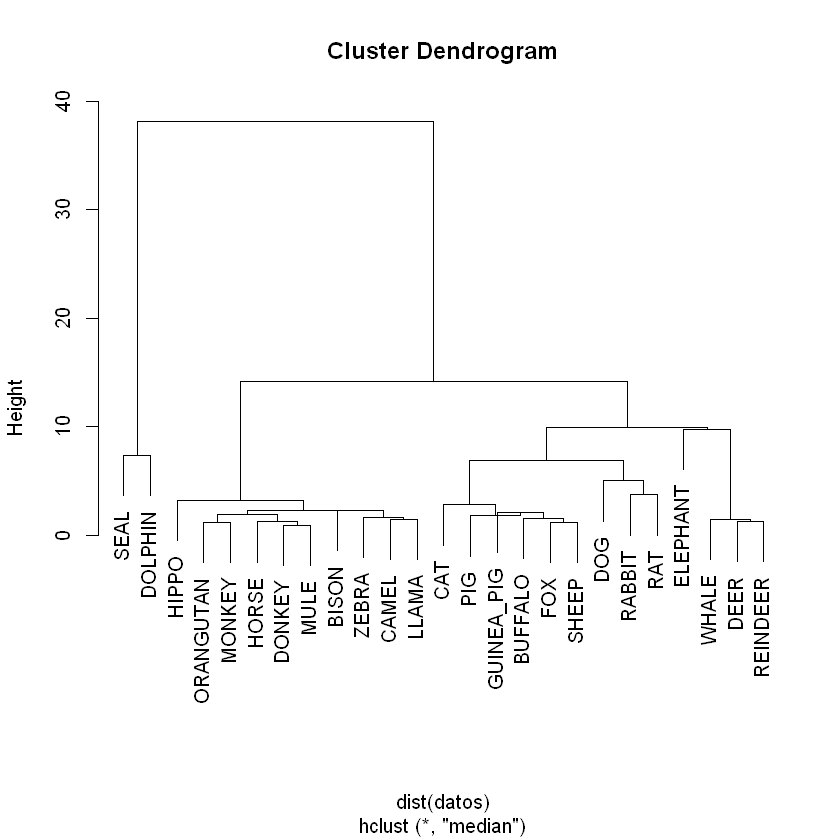

In [10]:
plot(res3)
res4<-hclust(d=dist(datos),method="median")
plot(res4)

Ejercicio 3: 


a) Explique como funciona el método hclust, describa parámetros de entrada y salida.


El metodo hclust implementa una agrupación jerárquica sobre un conjunto de disimilitudes y con algoritmos mas rapidos para analizar.
Parametros de entrada: Estructura de disimilitud producida por dist
Parametros de salida: Un objeto que produce hclust, y sirve para ser graficado por plot.


b) Interprete y comente los resultados obtenidos. 


Similar a mclust, agrupa los componentes de la leche, ordenados de manera jerarquica y los grupos quedan ordenados de manera diferente, al hacer 3 cortes, los datos se agrupan en 4 grupos.


c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

En cutree se pueden cambiar el numero de cortes y asi cambiar la cantidad de grupos. Tambien podemos cambiar el method, que representa la aglomeracion que se utiliza. Si cambiamos el metodo cambia la forma en que los resultados se presentan.

Ejercicio 4: 


a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.


b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [15]:
require("datasets")
data("iris") #cargar dataset iris desde libreria de r
str(iris)
summary(iris)
iris.new<- iris[,c(1,2,3,4)]
iris.class<- iris[,"Species"]
head(iris.new)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [16]:
normalize <- function(x){
  return ((x-min(x))/(max(x)-min(x)))
}

iris.new$Sepal.Length<- normalize(iris.new$Sepal.Length)
iris.new$Sepal.Width<- normalize(iris.new$Sepal.Width)
iris.new$Petal.Length<- normalize(iris.new$Petal.Length)
iris.new$Petal.Width<- normalize(iris.new$Petal.Width)
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000


            
class         1  2  3
  setosa      0  0 50
  versicolor 47  3  0
  virginica  14 36  0

[1] "PURITY:"


[1] 0.8866667

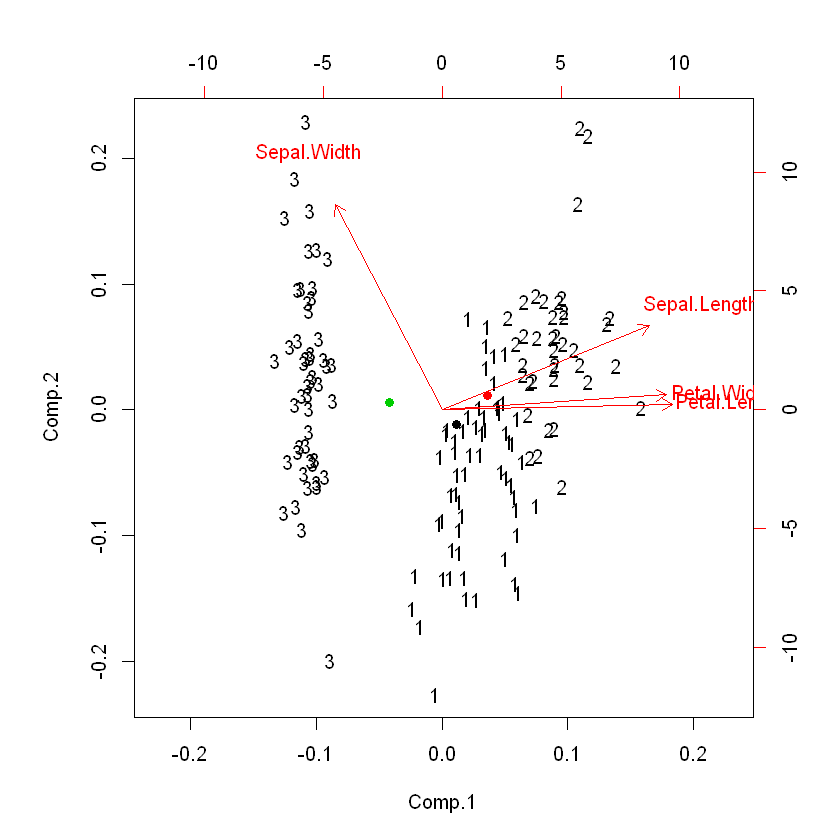

In [26]:
library(cluster)
#K-means
KMEANS<-kmeans(iris.new,3,iter.max=1000,nstart=10)
# pairs(features,col=KMEANS$cluster)
res <- princomp(iris.new, cor=TRUE)
res2 <- predict(res,KMEANS$centers)
# res2
# KMEANS
biplot(res,xlabs=KMEANS$cluster)
points(res2[,1:2],col=1:3,pch=19)

tablaK<-table(class,KMEANS$cluster)
tablaK
index1=max(tablaK[1,1:3])
index2=max(tablaK[2,1:3])
index3=max(tablaK[3,1:3])
purityK<-((index1)+(index2)+(index3))/150
print("PURITY:")
purityK

            
class         1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50

[1] "PURITY:"


[1] 0.9666667

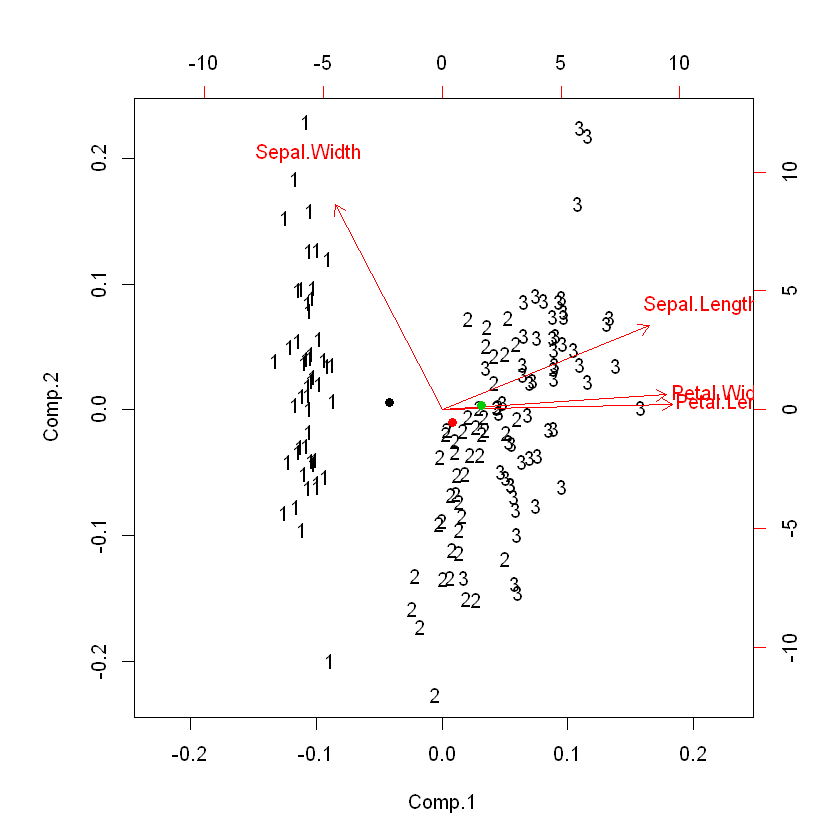

In [27]:
# BIC<-mclustBIC(features)
# summary(BIC)
GMM <-Mclust(iris.new, G=3)
# summary(GMM)
# GMM

cl <- GMM$classification
centers <- t(GMM$parameters$mean)
# centers
# cl
res <- princomp(iris.new, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
points(res2[,1:2],col=1:9,pch=19)

tablaGMM<-table(class,GMM$classification)
tablaGMM
index1=max(tablaGMM[1,1:3])
index2=max(tablaGMM[2,1:3])
index3=max(tablaGMM[3,1:3])
purityGMM<-((index1)+(index2)+(index3))/150
print("PURITY:")
purityGMM

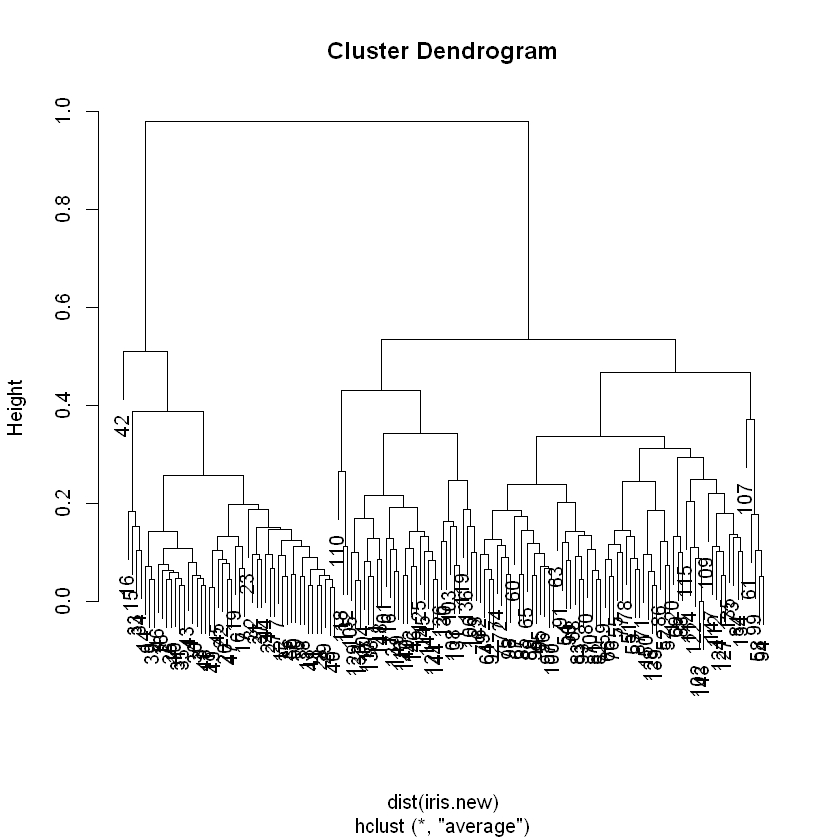

            resH
class         1  2  3
  setosa     50  0  0
  versicolor  0 50  0
  virginica   0 17 33

[1] "PURITY:"


[1] 0.8866667

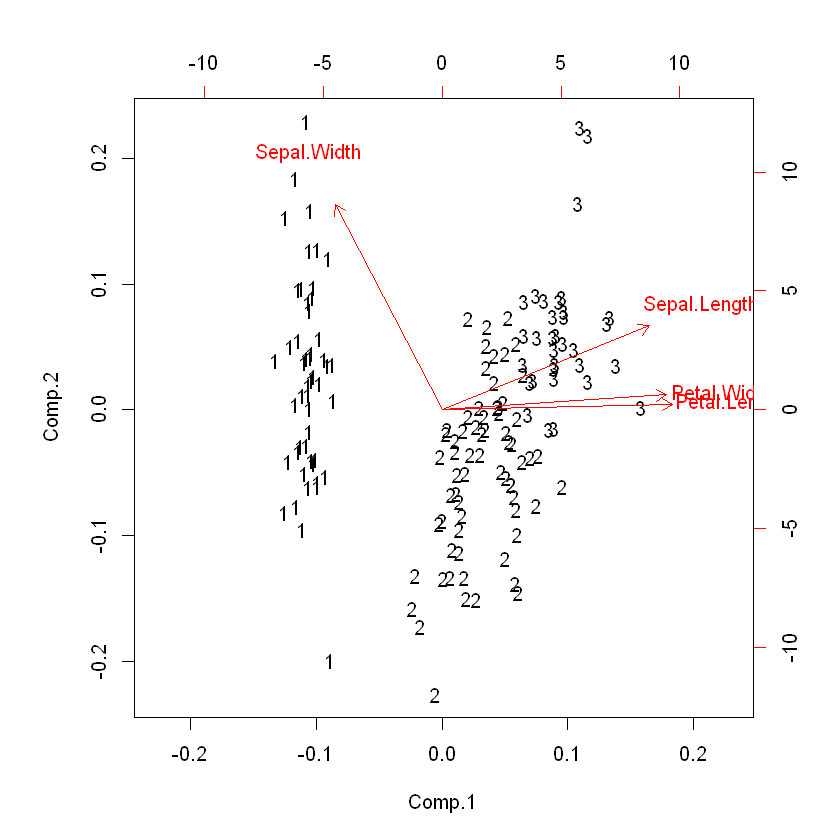

In [28]:
JERARQUICO <- hclust(dist(iris.new),method="average")
plot(JERARQUICO)
resH<-cutree(JERARQUICO,3)
biplot(res, xlabs= cutree(JERARQUICO,3))


tablaH<-table(class,resH)
tablaH
index1=max(tablaH[1,1:3])
index2=max(tablaH[2,1:3])
index3=max(tablaH[3,1:3])
purityH<-((index1)+(index2)+(index3))/150
print("PURITY:")
purityH

En los tres se calculo purity y el modelo con mayor precisión en este caso es GMM, siendo bastante estable con un 96,7%, mientras que k-means varía en cada iteración, y el modelo jerérquico varia bastante dependiendo de la metodología utilizada(en este caso se utilizó AVERAGE). 